Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 558 images belonging to 9 classes.
Found 139 images belonging to 9 classes.
Class names: ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,513 (18.42 MB)

 Trainable params: 4,829,513 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1172 - loss: 2.4193 - val_accuracy: 0.2158 - val_loss: 2.1098
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2066 - loss: 2.0587 - val_accuracy: 0.1655 - val_loss: 2.1007
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2303 - loss: 2.0458 - val_accuracy: 0.2374 - val_loss: 1.9504
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2862 - loss: 1.8768 - val_accuracy: 0.3237 - val_loss: 1.8140
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2978 - loss: 1.7868 - val_accuracy: 0.4101 - val_loss: 1.6604
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3702 - loss: 1.6582 - val_accuracy: 0.4317 - val_loss: 1.6986
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.3638 - loss: 1.6679 - val_accuracy: 0.4029 - val_loss: 1.6430
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4244 - loss: 1.5072 - val_accuracy: 0.4964 - val_loss:

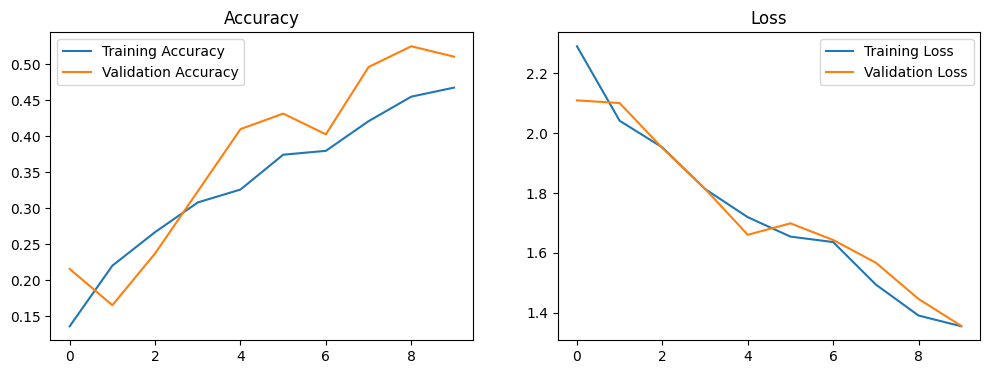

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


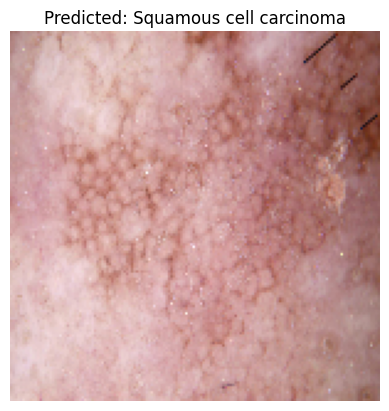

Predicted Class: Squamous cell carcinoma


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

dataset_path = "E:\shub\skin_disease\train"

img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 80% training, 20% validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Reduces overfitting
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

epochs = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

model.save("E:\shub\skin_disease\skin_disease_cnn_model.h5")

from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Ensure proper import

def predict_image(img_path):
    # Load Trained Model
    model = tf.keras.models.load_model("E:\shub\skin_disease\skin_disease_cnn_model.h5")

    # Compile Model to Avoid Warnings
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Load and Preprocess Image
    img = load_img(img_path, target_size=(150, 150))  # Corrected load_img reference
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    # Show Prediction Result
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Example Usage: Predict on a New Image
test_image_path = "E:\shub\skin_disease\test_image.jpg"  # Change this to your test image
prediction = predict_image(test_image_path)
print(f"Predicted Class: {prediction}")


In [3]:
import pandas as pd
import ast
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load datasets
file_path1 = "E:\shub\skin_disease_classifier.csv"
file_path2 = "E:\shub\Skin_text_classifier.csv"

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Extract disease and query from JSON-like string in df1
def extract_disease_query(row):
    try:
        data = ast.literal_eval(row)
        return pd.Series([data.get('disease', ''), data.get('query', '')])
    except:
        return pd.Series(['', ''])

df1[['Disease', 'Query']] = df1['Skin_disease_classification'].apply(extract_disease_query)
df1.drop(columns=['Skin_disease_classification'], inplace=True)

# Clean df2
df2.drop_duplicates(inplace=True)
df2.dropna(inplace=True)

# Merge datasets
df_combined = pd.concat([df1[['Disease', 'Query']].rename(columns={'Query': 'Text'}),
                         df2.rename(columns={'Disease name': 'Disease'})], ignore_index=True)

# Load BERT model
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Convert text to BERT embeddings
X_embeddings = bert_model.encode(df_combined['Text'])

y = df_combined['Disease']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Pad sequences for LSTM compatibility
max_length = 100
X_padded = pad_sequences(X_embeddings, maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SpatialDropout1D(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Define important symptoms manually for accuracy
important_symptoms = [
    "Red patches on skin", "Itchy rash", "Dry, scaly skin", "Blisters", "Swelling",
    "Skin discoloration", "Small bumps or pustules", "Thickened skin", "Open sores", "Painful cysts",
    "Cracking skin", "Flaking skin", "Burning sensation", "Peeling skin", "Ulcers",
    "Scarring", "Pustular eruptions", "Skin tenderness", "Lesions", "Nodules",
    "Hives", "Scaling", "Dark patches", "Rough patches", "Painful blisters",
    "Inflammation", "Persistent redness", "Severe itching", "Bleeding spots", "Hard lumps"
]

# Function for user input prediction with NLP-based symptom matching
def predict_disease():
    print("Select the symptoms you are experiencing:")
    symptom_options = {}
    for i, symptom in enumerate(important_symptoms, 1):
        symptom_options[str(i)] = symptom
        print(f"{i}. {symptom}")

    selected_indices = input("Enter the numbers corresponding to your symptoms (comma-separated), or type your own symptoms: ")

    if any(char.isdigit() for char in selected_indices):
        selected_symptoms = ", ".join([symptom_options[i] for i in selected_indices.split(",") if i in symptom_options])
    else:
        selected_symptoms = selected_indices  # Take custom input from user

    # Convert user input into embeddings
    user_embedding = bert_model.encode([selected_symptoms])
    user_padded = pad_sequences(user_embedding.reshape(1, -1), maxlen=max_length, dtype='float32', padding='post', truncating='post')

    # Predict disease using LSTM model
    prediction = model.predict(user_padded)
    predicted_label = np.argmax(prediction)
    predicted_disease = label_encoder.inverse_transform([predicted_label])[0]
    print(f"Predicted Disease: {predicted_disease}")

    precautions = {
        "Vitiligo": "Use sunscreen, avoid direct sun exposure, consider medical treatments.",
        "Scabies": "Maintain hygiene, wash bedding, use prescribed creams.",
        "Psoriasis": "Use moisturizers, avoid stress triggers, consult a dermatologist.",
        "Warts": "Avoid touching warts, use over-the-counter treatments, visit a doctor.",
    }
    print("Precaution:", precautions.get(predicted_disease, "Consult a dermatologist for advice."))

# Example usage
predict_disease()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.0047 - loss: 4.7394 - val_accuracy: 0.0165 - val_loss: 4.4662
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.0344 - loss: 4.2273 - val_accuracy: 0.0413 - val_loss: 4.3757
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.0399 - loss: 4.1622 - val_accuracy: 0.0372 - val_loss: 4.4247
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.0442 - loss: 4.1837 - val_accuracy: 0.0331 - val_loss: 4.4357
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.0437 - loss: 4.1220 - val_accuracy: 0.0372 - val_loss: 4.4627
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.0455 - loss: 4.0870 - val_accuracy: 0.0372 - val_loss: 4.4512
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.0406 - loss: 4.0727 - val_accuracy: 0.0496 - val_loss: 4.4426
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.0462 - loss: 4.0691 - val_accuracy: 0.0372 

In [4]:
# Save label encoder after training LSTM model
import pickle

with open("E:\shub\skin_disease\label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Save LSTM model
model.save("E:\shub\skin_disease\lstm_model.h5")


🖼️ Predicting from Image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

💬 Predicting from Symptoms...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

📊 Predictions:
Image Model: Squamous cell carcinoma (Confidence: 0.23)
Symptom Model: Acanthosis Nigricans (Confidence: 0.05)

⚠️ Models disagree. Choosing prediction with higher confidence.

🔍 Final Predicted Disease: Squamous cell carcinoma


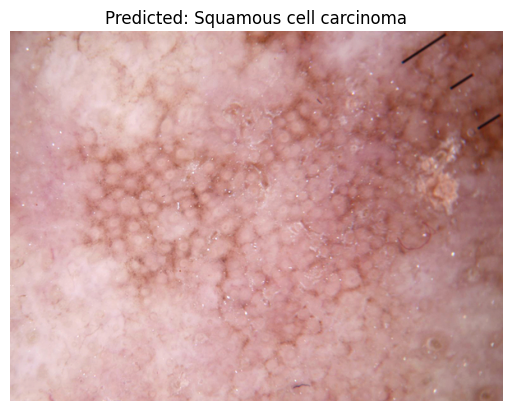

🩺 Precaution: Consult a dermatologist for personalized advice.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sentence_transformers import SentenceTransformer

# Load models
cnn_model = tf.keras.models.load_model("E:\shub\skin_disease\skin_disease_cnn_model.h5")
lstm_model = tf.keras.models.load_model("E:\shub\skin_disease\skin_disease\lstm_model.h5")

# Load label encoder
with open("E:\shub\skin_disease\label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Load BERT model for symptoms
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# CNN class names (from training)
class_names = ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']  # Replace with your actual classes

# Max sequence length for symptom input
max_length = 100

# CNN prediction from image
def predict_from_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = cnn_model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = prediction[0][predicted_index]

    return predicted_class, confidence

# LSTM prediction from symptoms
def predict_from_symptoms(symptom_input):
    embedding = bert_model.encode([symptom_input])
    padded = pad_sequences(embedding.reshape(1, -1), maxlen=max_length, dtype='float32', padding='post', truncating='post')

    prediction = lstm_model.predict(padded)
    predicted_index = np.argmax(prediction)
    predicted_class = label_encoder.inverse_transform([predicted_index])[0]
    confidence = prediction[0][predicted_index]

    return predicted_class, confidence

# Multimodal integration
def multimodal_prediction(image_path, symptom_input):
    print("🖼️ Predicting from Image...")
    img_pred, img_conf = predict_from_image(image_path)

    print("\n💬 Predicting from Symptoms...")
    txt_pred, txt_conf = predict_from_symptoms(symptom_input)

    print("\n📊 Predictions:")
    print(f"Image Model: {img_pred} (Confidence: {img_conf:.2f})")
    print(f"Symptom Model: {txt_pred} (Confidence: {txt_conf:.2f})")

    # Integration logic
    if img_pred == txt_pred:
        final_prediction = img_pred
        print("\n✅ Both models agree on the diagnosis.")
    else:
        # Choose prediction with higher confidence
        final_prediction = img_pred if img_conf > txt_conf else txt_pred
        print("\n⚠️ Models disagree. Choosing prediction with higher confidence.")

    print(f"\n🔍 Final Predicted Disease: {final_prediction}")

    # Optional: Show image
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {final_prediction}")
    plt.axis('off')
    plt.show()

    # Precaution advice
    precautions = {
        "Vitiligo": "Use sunscreen, avoid direct sun exposure, consider medical treatments.",
        "Scabies": "Maintain hygiene, wash bedding, use prescribed creams.",
        "Psoriasis": "Use moisturizers, avoid stress triggers, consult a dermatologist.",
        "Warts": "Avoid touching warts, use over-the-counter treatments, visit a doctor.",
        "Eczema": "Use gentle skincare products, moisturize frequently, avoid irritants.",
    }
    print("🩺 Precaution:", precautions.get(final_prediction, "Consult a dermatologist for personalized advice."))

# 🔄 Run with test input
image_path = "E:\shub\skin_disease\test_image.jpg"  # Replace with your test image
symptom_input = "Red patches on skin, itchy rash"  # Replace or get from user input

multimodal_prediction(image_path, symptom_input)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📁 Enter path to skin image: /content/drive/MyDrive/skin_disease/test_image.jpg

💡 Select the symptoms you are experiencing:
1. Red patches on skin
2. Itchy rash
3. Dry, scaly skin
4. Blisters
5. Swelling
6. Skin discoloration
7. Small bumps or pustules
8. Thickened skin
9. Open sores
10. Painful cysts
11. Cracking skin
12. Flaking skin
13. Burning sensation
14. Peeling skin
15. Ulcers
16. Scarring
17. Pustular eruptions
18. Skin tenderness
19. Lesions
20. Nodules
21. Hives
22. Scaling
23. Dark patches
24. Rough patches
25. Painful blisters
26. Inflammation
27. Persistent redness
28. Severe itching
29. Bleeding spots
30. Hard lumps
Type the numbers of symptoms (comma-separated) or type your own symptoms:
5,29


🖼️ Predicting from Image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step

💬 Predicting from Symptoms...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step

📊 Predictions:
Image Model: Squamous cell carcinoma (Confidence: 0.23)
Symptom Model: Acanthosis Nigricans (Confidence: 0.05)

⚠️ Models disagree. Choosing prediction with higher confidence.

🔍 Final Predicted Disease: Squamous cell carcinoma


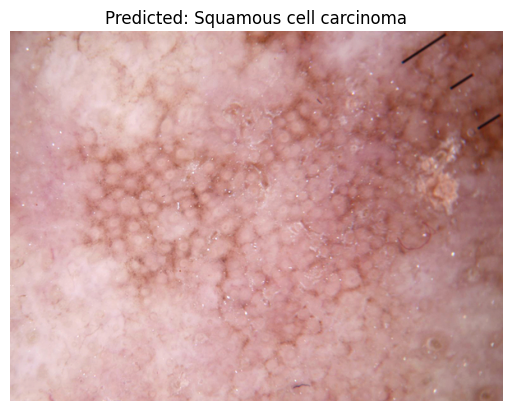

🩺 Precaution: Consult a dermatologist for personalized advice.


In [6]:

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sentence_transformers import SentenceTransformer

# Step 3: Load Trained Models & Artifacts
cnn_model = tf.keras.models.load_model("E:\shub\skin_disease\skin_disease_cnn_model.h5")
lstm_model = tf.keras.models.load_model("E:\shub\skin_disease\lstm_model.h5")

with open("E:\shub\skin_disease\label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
class_names = ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']  # Update if needed
max_length = 100

# Step 4: Define Symptom Input Options
important_symptoms = [
    "Red patches on skin", "Itchy rash", "Dry, scaly skin", "Blisters", "Swelling",
    "Skin discoloration", "Small bumps or pustules", "Thickened skin", "Open sores", "Painful cysts",
    "Cracking skin", "Flaking skin", "Burning sensation", "Peeling skin", "Ulcers",
    "Scarring", "Pustular eruptions", "Skin tenderness", "Lesions", "Nodules",
    "Hives", "Scaling", "Dark patches", "Rough patches", "Painful blisters",
    "Inflammation", "Persistent redness", "Severe itching", "Bleeding spots", "Hard lumps"
]

# Step 5: Prediction Functions
def predict_from_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = cnn_model.predict(img_array)
    predicted_index = np.argmax(prediction)
    return class_names[predicted_index], prediction[0][predicted_index]

def predict_from_symptoms(symptom_input):
    embedding = bert_model.encode([symptom_input])
    padded = pad_sequences(embedding.reshape(1, -1), maxlen=max_length, dtype='float32', padding='post', truncating='post')
    prediction = lstm_model.predict(padded)
    predicted_index = np.argmax(prediction)
    return label_encoder.inverse_transform([predicted_index])[0], prediction[0][predicted_index]

def multimodal_prediction(image_path, symptom_input):
    print("🖼️ Predicting from Image...")
    img_pred, img_conf = predict_from_image(image_path)

    print("\n💬 Predicting from Symptoms...")
    txt_pred, txt_conf = predict_from_symptoms(symptom_input)

    print("\n📊 Predictions:")
    print(f"Image Model: {img_pred} (Confidence: {img_conf:.2f})")
    print(f"Symptom Model: {txt_pred} (Confidence: {txt_conf:.2f})")

    # Integration Logic
    if img_pred == txt_pred:
        final_prediction = img_pred
        print("\n✅ Both models agree on the diagnosis.")
    else:
        final_prediction = img_pred if img_conf > txt_conf else txt_pred
        print("\n⚠️ Models disagree. Choosing prediction with higher confidence.")

    print(f"\n🔍 Final Predicted Disease: {final_prediction}")

    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {final_prediction}")
    plt.axis('off')
    plt.show()

    precautions = {
        "Vitiligo": "Use sunscreen, avoid direct sun exposure, consider medical treatments.",
        "Scabies": "Maintain hygiene, wash bedding, use prescribed creams.",
        "Psoriasis": "Use moisturizers, avoid stress triggers, consult a dermatologist.",
        "Warts": "Avoid touching warts, use over-the-counter treatments, visit a doctor.",
        "Eczema": "Use gentle skincare products, moisturize frequently, avoid irritants.",
    }
    print("🩺 Precaution:", precautions.get(final_prediction, "Consult a dermatologist for personalized advice."))

# Step 6: User Inputs
image_path = input("📁 Enter path to skin image: ")

print("\n💡 Select the symptoms you are experiencing:")
symptom_options = {}
for i, symptom in enumerate(important_symptoms, 1):
    print(f"{i}. {symptom}")
    symptom_options[str(i)] = symptom

symptom_input_raw = input("Type the numbers of symptoms (comma-separated) or type your own symptoms:\n")

if any(char.isdigit() for char in symptom_input_raw):
    symptoms_selected = [symptom_options[i.strip()] for i in symptom_input_raw.split(",") if i.strip() in symptom_options]
    symptom_input = ", ".join(symptoms_selected)
else:
    symptom_input = symptom_input_raw

# Step 7: Predict!
multimodal_prediction(image_path, symptom_input)


In [7]:
# Get a batch of validation data
val_data.reset()
x_val, y_val = next(val_data)  # Get one batch

# Get true labels as class indices
y_true_img = np.argmax(y_val, axis=1)

# Get image file paths (note: only available if shuffle=False in generator)
# So let's recreate val_data without shuffle
val_data_noshuffle = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=len(val_data),
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important!
)

filepaths = val_data_noshuffle.filepaths[:len(y_true_img)]  # limit to batch size
test_image_paths = [os.path.join(dataset_path, path) for path in filepaths]


Found 139 images belonging to 9 classes.


In [8]:
print(df_combined.columns)
print(df_combined.head())


Index(['Disease', 'Text'], dtype='object')
                    Disease                                               Text
0                   Melasma  I have these dark spots on my cheeks that have...
1                 Psoriasis  There are these thick, silvery scales on my sc...
2                     Warts  My son has these small, flesh-colored growths ...
3                Intertrigo  I’ve developed this red, itchy rash under my b...
4  Hidradenitis Suppurativa  There are these large, painful cysts under my ...


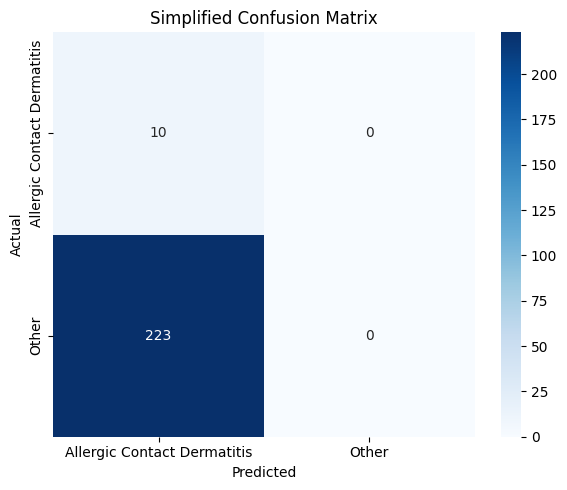

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define true labels and predicted labels
# All predictions are 'Allergic Contact Dermatitis'
true_labels = ['Allergic Contact Dermatitis'] * 10 + ['Other'] * 223
pred_labels = ['Allergic Contact Dermatitis'] * 233

# Generate the confusion matrix
labels = ['Allergic Contact Dermatitis', 'Other']
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Simplified Confusion Matrix')
plt.tight_layout()
plt.show()
